In [1]:
import socket

socket.gethostname()  # Should not be a login node.

'J1YCSV3'

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [4]:
# Create database connection
db_path = "../../data/optimal_tuning/maxTipDxc_10/log_maxTipDxc_10.sql"
engine = create_engine(f"sqlite:///{db_path}")

# Read the table
df = pd.read_sql_table("driver_iterations", engine, index_col="counter")

In [5]:
df.iloc[0].outputs

'{"comp.aeroelastic.AEP": [81775669.62879232], "comp.aeroelastic.max_TipDxc_towerPassing": [12.486827850341797], "comp.tune_rosco_ivc.TCIPC_MaxTipDeflection": [10.0], "comp.tune_rosco_ivc.ps_percent": [0.8]}'

In [6]:
# Extract outputs dictionary from each row
data = []
for idx, row in df.iterrows():
    outputs_dict = ast.literal_eval(row["outputs"])
    data.append(
        {
            "iteration": idx,
            "AEP": outputs_dict.get("comp.aeroelastic.AEP")[0],
            "max_TipDxc_towerPassing": outputs_dict.get(
                "comp.aeroelastic.max_TipDxc_towerPassing"
            )[0],
            "TCIPC_MaxTipDeflection": outputs_dict.get(
                "comp.tune_rosco_ivc.TCIPC_MaxTipDeflection"
            )[0],
            "ps_percent": outputs_dict.get("comp.tune_rosco_ivc.ps_percent")[0],
        }
    )

# Create new dataframe
df_processed = pd.DataFrame(data)
df_processed.head(3)

,iteration,AEP,max_TipDxc_towerPassing,TCIPC_MaxTipDeflection,ps_percent
0,1,8.177567e+07,12.486828,10.0,0.8
1,2,8.177567e+07,12.486828,10.0,0.8
2,3,8.108043e+07,16.400293,15.0,0.8


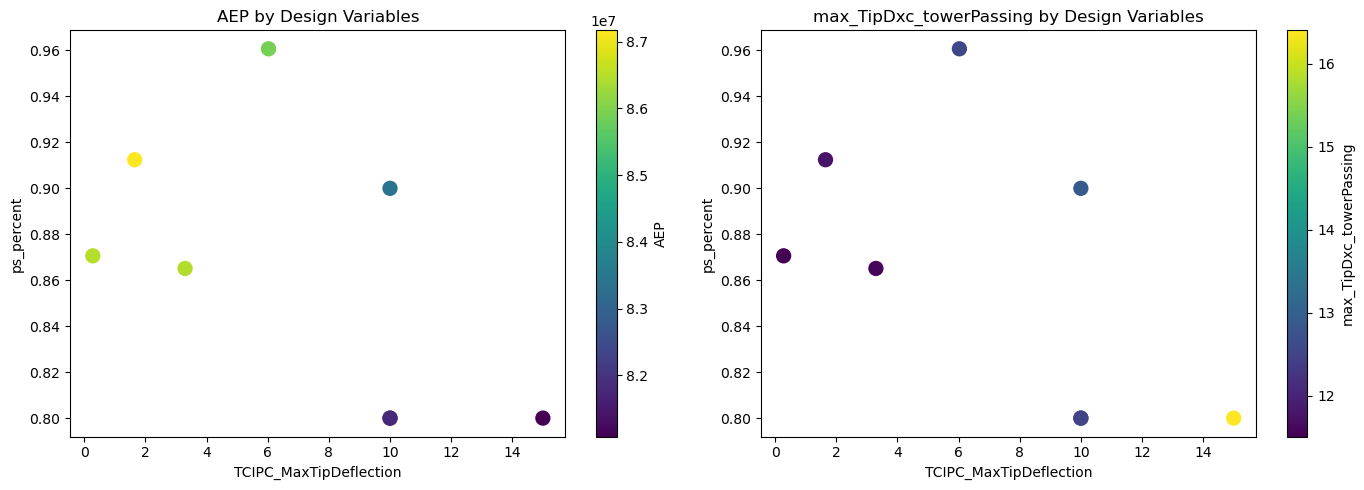

In [7]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: AEP in color
scatter1 = ax1.scatter(
    df_processed["TCIPC_MaxTipDeflection"],
    df_processed["ps_percent"],
    c=df_processed["AEP"],
    cmap="viridis",
    s=100,
)
ax1.set_title("AEP by Design Variables")
ax1.set_xlabel("TCIPC_MaxTipDeflection")
ax1.set_ylabel("ps_percent")
plt.colorbar(scatter1, ax=ax1, label="AEP")

# Plot 2: max_TipDxc_towerPassing in color
scatter2 = ax2.scatter(
    df_processed["TCIPC_MaxTipDeflection"],
    df_processed["ps_percent"],
    c=df_processed["max_TipDxc_towerPassing"],
    cmap="viridis",
    s=100,
)
ax2.set_title("max_TipDxc_towerPassing by Design Variables")
ax2.set_xlabel("TCIPC_MaxTipDeflection")
ax2.set_ylabel("ps_percent")
plt.colorbar(scatter2, ax=ax2, label="max_TipDxc_towerPassing")

plt.tight_layout()
plt.show()

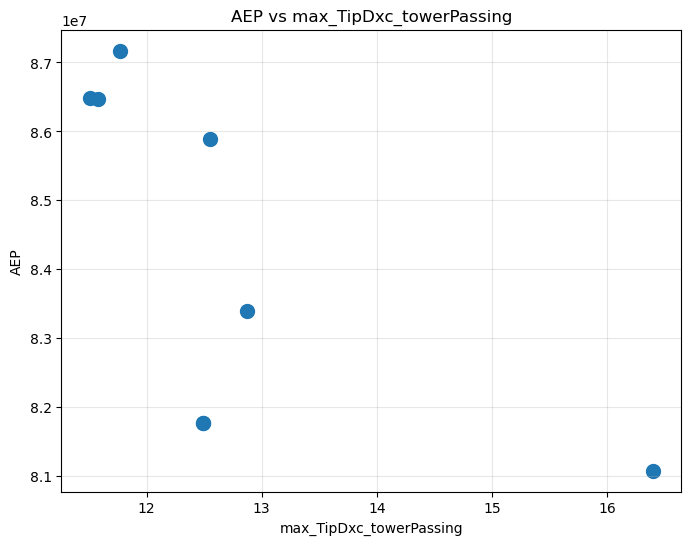

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df_processed["max_TipDxc_towerPassing"], df_processed["AEP"], s=100)
plt.xlabel("max_TipDxc_towerPassing")
plt.ylabel("AEP")
plt.title("AEP vs max_TipDxc_towerPassing")
plt.grid(True, alpha=0.3)
plt.show()